In [19]:
from vnstock import *
from function import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [72]:
ticket = ['CII','CTD','CTG','DHG','DPM','EIB','FPT']

frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date="2013-01-01", 
                            end_date='2023-02-11')    
    a["ticker"] = i
    frame.append(a)
    
q = pd.concat(frame)
close= q.pivot_table(values="Close", columns="ticker", index="TradingDate")

ticket = ['CII','CTD','CTG','DHG','DPM','EIB','FPT']

frame = []
for i in ticket:
    a =financial_report (symbol=i, report_type='BalanceSheet', frequency='Yearly')
    a= a.set_index(a.columns[0]).T.iloc[:,0]
    b =financial_report (symbol=i, report_type='IncomeStatement', frequency='Yearly').set_index("CHỈ TIÊU").T.iloc[:,0]
    c = pd.DataFrame(b/a,columns=["Income/Asset"])
    c["ticker"] = i
    frame.append(c)
    
p = pd.concat(frame)


In [83]:
ia = p.pivot_table(values="Income/Asset", columns="ticker", index=p.index)

In [88]:
def weights(alpha,neutrali=0):
    # Normalize
    alpha = alpha.div(alpha.abs().sum(axis=1), axis=0)
    if neutrali == 1:
        alpha = alpha.sub(alpha.mean(axis=1),axis=0)
    # Max stock weight = 0.2
    alpha[alpha > 0.2] = 0.2
    return alpha

In [91]:
w=weights(ia)
w1=weights(ia,1)

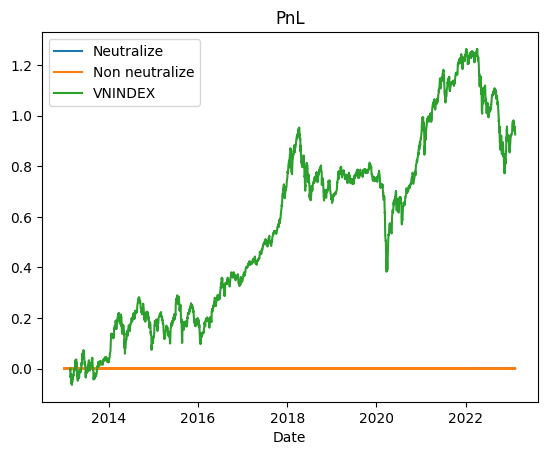

In [92]:
returns = close.pct_change()
neu=Simresult(weights=w,returns=returns)
neu.plot_pnl(type="Neutralize")

non_neu=Simresult(weights=w1,returns=returns)
non_neu.plot_pnl(type="Non neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [93]:
neu.get_summary()

AttributeError: 'Index' object has no attribute 'year'

In [65]:
financial_report (symbol="CII", report_type='IncomeStatement', frequency='Yearly').set_index("CHỈ TIÊU").T

2013    7.184988e+11
2014    2.626127e+12
2015    1.774657e+12
2016    1.233178e+12
2017    2.108409e+12
2018    2.702952e+12
2019    1.848726e+12
2020    5.408406e+12
2021    2.908694e+12
2022    5.914273e+12
Name: Doanh số, dtype: float64

In [22]:
a =financial_report (symbol='SSI', report_type='BalanceSheet', frequency='Yearly')
b =financial_report (symbol='SSI', report_type='IncomeStatement', frequency='Yearly')

In [39]:
c= a.set_index("CHỈ TIÊU").T["TỔNG CỘNG TÀI SẢN"]/b.set_index("CHỈ TIÊU").T["Doanh thu hoạt động"]

In [42]:
pd.DataFrame(c,columns=["Asset/Income"])

,Asset/Income
2013,10.599269
2014,5.697544
2015,7.853496
2016,5.967230
2017,6.474766
2018,6.486980
2019,8.359907
2020,8.191243
2021,6.824105
2022,8.243031
